In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

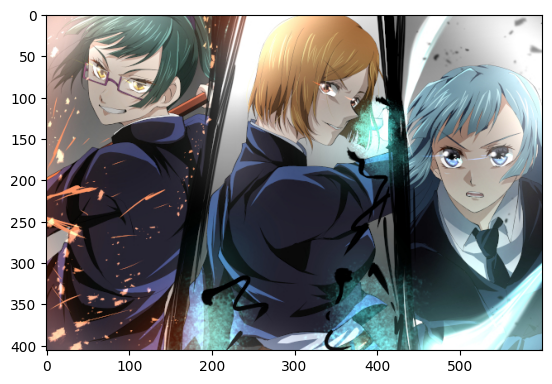

In [11]:
img = cv2.imread('../resources/img/Kasumi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

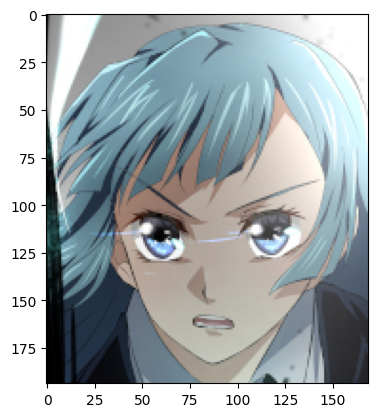

In [13]:
cara = cv2.imread('../resources/img/miwa.jpg')
cara = cv2.cvtColor(cara, cv2.COLOR_BGR2RGB)
plt.imshow(cara)

In [12]:
cara.shape

(554, 554, 3)

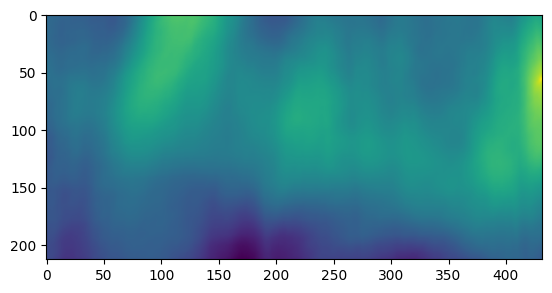

In [18]:
mi_metodo = eval('cv2.TM_CCOEFF')
result = cv2.matchTemplate(img, cara, mi_metodo)
plt.imshow(result)

In [14]:
metodos = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

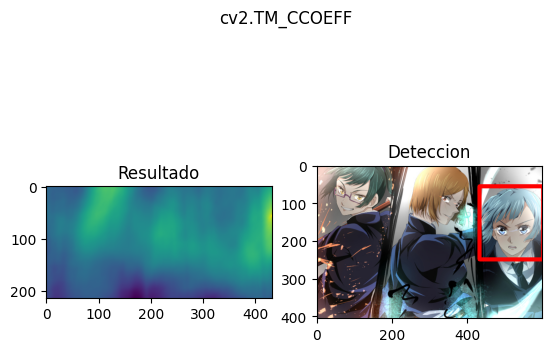

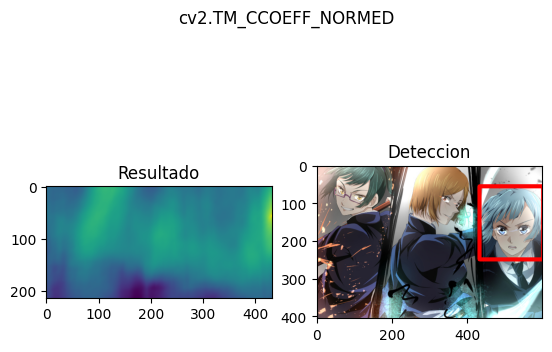

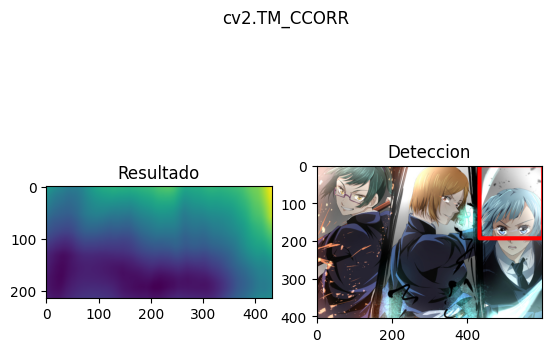

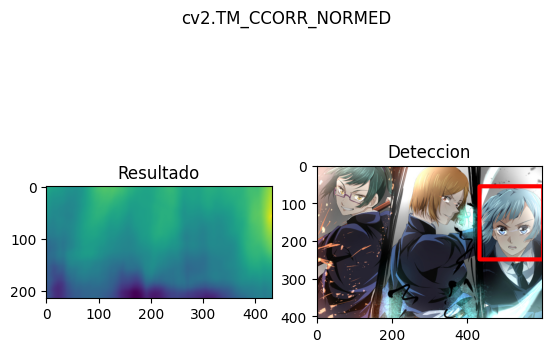

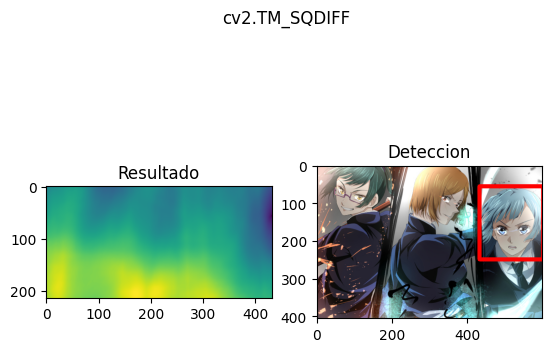

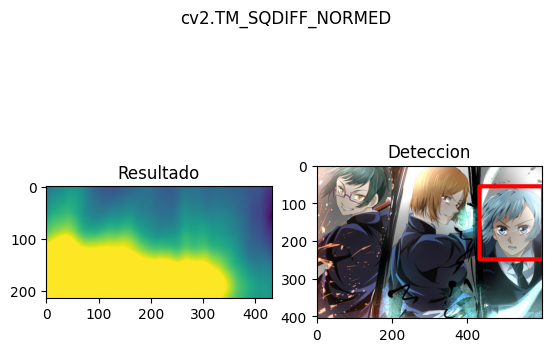

In [21]:
for m in metodos:

    # Copia de la imagen original
    copia = img.copy()
    # Extraccion del metodo.
    metodo = eval(m)

    # Template Matching
    res = cv2.matchTemplate(copia, cara, metodo)

    # Extraemos minimos y maximos, y su sitio donde estan posicionados.
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Escoger metodos que funcionan con el minimo.
    if metodo in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        a_izq = min_loc # (x, y)
    else:
        a_izq = max_loc

    # Extraemos el tamanio de la cara.
    alto, ancho, canales = cara.shape

    # Asignamos la parte derecha y abajo del rectangulo.
    a_der = (a_izq[0] + ancho, a_izq[1] + alto)

    # Dibujamos el rectangulo.
    cv2.rectangle(copia, a_izq, a_der, 255, 10)

    # Creamos un subplot de 2 x 1 y posicionamos los resultados.
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Resultado')
    
    plt.subplot(122)
    plt.imshow(copia)
    plt.title('Deteccion')

    plt.suptitle(m)

    plt.show()
    print('\n')
    print('\n')